In [18]:
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
import random
import statistics as stat
%run Backend_Retrieval.ipynb
plt.style.use('seaborn-deep')

In [19]:
def find_crit_ind(flow):
    fmax = flow.max()
    optind = 0
    for i in range(len(flow)):
        if flow[i] == fmax:
            optind += i
            break
    return optind

In [41]:
def find_crash_point(flow):
    cpoint = 0
    for i in range(len(flow)):
        if flow[i]==0:
            cpoint+=i
            break
    return cpoint

In [96]:
AccExp = np.load('Data Storage\Varying Acceleration Exponent 7.npy')
StandMod = np.load('Data Storage\Standard Model 1(2D).npy')

In [118]:
#input array must contain 2 rows, first row flow, second velocity
#each row contains value for each density
#third dimension is the same for itterations over params


def run_analysis(data, start_stop_cars, param_itterated, L, standard_val, standard_model):   #array, list, string, int
    x_dens = np.linspace((start_stop_cars[0]*1000)/L, (start_stop_cars[1]*1000)/L, start_stop_cars[1]-start_stop_cars[0])
    
    critdenlist = []
    critflowlist = []
    freespeed = []
    critspeedlist = []
    crashpointlist = []
    for jj in range(len(data[0,0,:])):
        critdenlist.append(x_dens[find_crit_ind(data[0,:,jj])])
        critflowlist.append(data[0,:,jj].max())
        freespeed.append(data[1,0,jj])
        critspeedlist.append(data[1,find_crit_ind(data[0,:,jj]),jj])
        crashpointlist.append(find_crash_point(data[0,:,jj]))
    
    variances = np.linspace(1/3*(standard_val),3*standard_val,len(data[0,0,:]))
    fundamentalfig2, axs = plt.subplots(2,2)
    c = cm.rainbow(np.linspace(0, 1, len(data[0,0,:])))

    for jj in range(len(data[0,0,:])):
        if jj ==0:
            axs[0,0].plot(critdenlist[jj],critflowlist[jj],marker = 'x',color = 'k', zorder = 3,label = 'Peak Flow Points')
            axs[0,0].plot(crashpointlist[jj],0, marker = 's', color = 'k', zorder = 2, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None', label = 'Jam Points')
            axs[0,0].plot(x_dens,data[0,:,jj], color = c[jj],label = round(variances[jj],3))
        else:
            axs[0,0].plot(critdenlist[jj],critflowlist[jj],marker = 'x',color = 'k', zorder = 3)
            axs[0,0].plot(crashpointlist[jj],0, marker = 's', color = 'k', zorder = 2, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
            axs[0,0].plot(x_dens,data[0,:,jj], color = c[jj],label = round(variances[jj],3))
        
        axs[0,0].vlines(critdenlist[jj],0,critflowlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[0,0].hlines(critflowlist[jj],0,critdenlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[0,0].set_ylabel('Global Flow (cars/hr)')
        axs[0,0].legend(loc = (1.2,-0.1),edgecolor = 'k')
        axs[1,0].plot(x_dens,data[1,:,jj], color = c[jj])
        axs[1,0].plot(critdenlist[jj],critspeedlist[jj],marker = 'x',color = 'k', zorder = 3)
        axs[1,0].plot(crashpointlist[jj],0, marker = 's', color = 'k', zorder = 2, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
        axs[1,0].vlines(critdenlist[jj],0,critspeedlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,0].hlines(critspeedlist[jj],0,critdenlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,0].set_xlabel('Global Density (cars/km)')
        axs[1,0].set_ylabel('Average Speed (m/s)')
        axs[1,1].plot(data[0,:,jj], data[1,:,jj], color = c[jj])
        axs[1,1].plot(critflowlist[jj],critspeedlist[jj],marker = 'x',color = 'k', zorder = 2)
        axs[1,1].plot(crashpointlist[jj],0, marker = 's', color = 'k', zorder = 2, markeredgewidth=1,markeredgecolor='k',
markerfacecolor='None')
        axs[1,1].vlines(critflowlist[jj],0,critspeedlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,1].hlines(critspeedlist[jj],0,critflowlist[jj],c[jj],'dashed',linewidth=0.5)
        axs[1,1].set_xlabel('Global Flow (cars/hr)')
        axs[0,1].axis('off')
        #plt.savefig('trafsim.png', dpi = 500)
    
    
    special_points_high = []
    special_points_low = []
    #ANALYSIS
    #Crit Flow
    special_points_high.append((max(data[0,:,-1])/max(standard_model[0,:]))*100)
    special_points_low.append((max(data[0,:,0])/max(standard_model[0,:]))*100)
    #Crit dens
    a = find_crit_ind(standard_model[0,:])
    special_points_high.append((critdenlist[-1]/x_dens[a])*100)
    special_points_low.append((critdenlist[0]/x_dens[a])*100)
    #crit vel
    special_points_high.append((critspeedlist[-1]/standard_model[1,a])*100)
    special_points_low.append((critspeedlist[0]/standard_model[1,a])*100)
    #jam point
    special_points_high.append((crashpointlist[-1]/find_crash_point(standard_model[0,:]))*100)
    special_points_low.append((crashpointlist[0]/find_crash_point(standard_model[0,:]))*100)
    
    print('Crit: Flo Den Vel Jam')
    print(special_points_high)
    print(special_points_low)


Crit: Flo Den Vel Jam
[108.32677955084576, 82.22090084733165, 131.74878594021783, 100.0]
[83.58342025648078, 120.00148654675189, 69.65285021373398, 100.0]


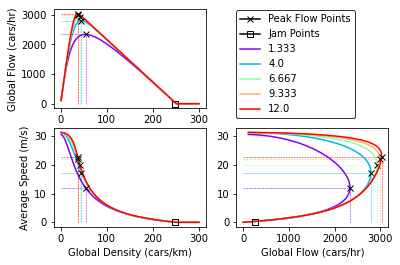

In [119]:
run_analysis(AccExp,[1,300],'Acceleration Exponent',1000, 4,StandMod)